# Find similary documents for a query document

依據文字的語義，計算文章之間的相似度

    (1)概念:取得每篇新聞的向量(768維度)表達，計算兩兩相似度，排序相似度，取得數篇相關新聞推薦。
    (2)新聞向量是BERT模型產生的，BERT語言模型是Google的一種NLP產品，它是由一種叫做Transformer(變形金剛、變壓器)的深度學習模型所訓練，訓練語料非常龐大:Wikipedia(約25億字)和Google的BooksCorpus(約8億字)。Google使用64個TPU訓練整整4天，花費超過22萬台幣，真正的成本還要包含開發實驗階段訓練失敗的次數、工程式的薪資等。
    (3)BERT的下游任務除了這裡的新聞推薦之外，還可以用在NLP理解的各種任務，包括我們下一次會提到的情緒分類、新聞分類等任務。
    (4)BERT目前已經發展成一個大家族，它可以讓電腦深入了解人類的語言與世界！🚀

    首先我們必須取得文字的向量(詞嵌入,詞向量)，之後就可以進行後續的應用。
    NLP下游任務非常多，之後的課程將會做情緒分類，新聞文章做分類等下游任務。
    此處我們進行較簡單的應用:比較文章語義相似性，可以做相似文章內容的推薦系統。

# Word vector詞向量, Word embedding詞嵌入

What is Word Embedding? 

"word embedding" or "word vector"

"詞嵌入" or "詞向量"

    Word Embedding is a type of word representation that allows words with similar meaning to be understood by machine learning algorithms. 

    Technically speaking, it is a mapping of words into vectors of real numbers using the neural network, probabilistic model, or dimension reduction on word co-occurrence matrix. 

    It is language modeling and feature learning technique. Word embedding is a way to perform mapping using a neural network. 

    There are various word embedding models available such as word2vec (Google), Glove (Stanford) and fastext (Facebook).

    Reference:
    https://www.guru99.com/word-embedding-word2vec.html

![](https://www.researchgate.net/profile/Le-Lu-9/publication/303376372/figure/fig6/AS:668376489816091@1536364781736/Example-words-embedded-in-the-vector-space-using-word-to-vector-modeling.png)

# Cosine similarity between two vectors計算兩兩向量特徵之相似度

cosine值 介於-1 ~ 1 之間  

cosine(0) = 1   0度cosine值越接近1 越相似!!

cosine(90) = 0  兩者無關

cosine(180) = -1  表示兩者意見相左 相反 



    Since the cos(θ) value is in the range [−1,1] :

    1 similar vectors (positive co-linear)
    0 independent vectors (orthogonal)
    −1 strongly opposite vectors
    
    Example : Let two user U1 and U2, and sim(U1,U2) the similarity between these two users according to their taste for movies:

    sim(U1,U2)=1 if the two users have exactly the same taste (or if U1=U2)
    
    sim(U1,U2)=0 if we do not find any correlation between the two users, e.g. if they have not seen any common movies

    sim(U1,U2)=−1 if users have opposed tastes, e.g. if they rated the same movies in an opposite way

    https://stats.stackexchange.com/questions/198810/interpreting-negative-cosine-similarity

![](https://adriancolyer.files.wordpress.com/2016/04/word2vec-king-queen-vectors.png?w=656&zoom=2)

<img src='https://pic3.zhimg.com/v2-fc17fd8286802d0ad2ff45e4068cc489_1200x500.jpg'>

Given two vectors of attributes, A and B, the cosine similarity, cos(θ), is represented using a dot product and magnitude as

<img src='https://i.stack.imgur.com/Qmq2w.png' style='background-color:white'>

where Ai and Bi are components of vector A and B respectively.

The resulting similarity ranges from −1 meaning exactly opposite, to 1 meaning exactly the same, with 0 indicating orthogonality or decorrelation, while in-between values indicate intermediate similarity or dissimilarity.

Reference:
https://www.wikiwand.com/en/Cosine_similarity

# Reasoning with word vectors

    The vectors are very good at answering analogy questions of the form a is to b as c is to ?. For example, man is to woman as uncle is to ? (aunt) using a simple vector offset method based on cosine distance.

For example, here are vector offsets for three word pairs illustrating the gender relation:

![](https://adriancolyer.files.wordpress.com/2016/04/word2vec-gender-relation.png?w=596&zoom=2)

![](https://adriancolyer.files.wordpress.com/2016/04/word2vec-plural-relation.png?w=610&zoom=2)

Reference: https://blog.acolyer.org/2016/04/21/the-amazing-power-of-word-vectors/

# BERT
    
<img src="https://riccardo-cantini.netlify.app/post/bert_text_classification/featured_hua8bf7d9829a3c2e45f4e3633adf00c19_474726_720x0_resize_lanczos_2.png">
   
    What is BERT?
    Bidirectional Encoder Representations from Transformers (BERT) is a Natural Language Processing Model proposed by Google Research in 2018. It is based on a multi-layer bidirectional Transformer, pre-trained on two unsupervised tasks using a large crossdomain corpus:

    * Masked Language Modeling (MLM): 15% of the words in each sequence are replaced with a [MASK] token. The model then attempts to predict the masked words, based on the context provided by the non-masked ones.
    * Next Sentence Prediction (NSP): the model receives pairs of sentences as input and learns to predict if the second sentence is the subsequent sentence in the original document.
    
    BERT is deeply bidirectional, which means that it can learn the context of a word based on all the information contained in the input sequence, joinlty considering previous and subsequent tokens. In fact, the use of MLM objective enables the representation to fuse the left and right contexts, allowing the pre-training of a deep bidirectional language representation model. This is a key difference comparing to previous language representation models like OpenAI GPT, which uses a unidirectional (left-to-right) language model, or ELMo, which uses a shallow concatenation of independently trained left-to-right and right-to-left language models. BERT outperformed many task-specific architectures, advancing the state of the art in a wide range of Natural Language Processing tasks, such as textual entailment, text classification and question answering.

    For further details, you might want to read the original BERT paper.

    什麼是 BERT？
    模型來自 Transformers 的雙向編碼器表示 (BERT)是 Google Research 在 2018 年提出的自然語言處理模型。它基於多層雙向 Transformer，使用大型跨域語料庫對兩個無監督任務進行預訓練。

    大量的訓練數據

        33 億字的海量數據集

        BERT 專門針對 Wikipedia（約 2.5B 字）和 Google 的 BooksCorpus（約 8 億字）進行了訓練。這些大型信息數據集不僅有助於 BERT 深入了解語言，還有助於了解我們的世界！🚀

        在這麼大的數據集上訓練需要很長時間。BERT 的訓練得益於新穎的 Transformer 架構，並通過使用 TPU（張量處理單元——谷歌專為大型 ML 模型構建的定制電路）加快了訓練速度。— 64 個 TPU 在 4 天的時間裡訓練了 BERT。


    * 掩碼語言建模 (MLM)：每個序列中 15% 的單詞被替換為一個[MASK]標記。然後，該模型嘗試根據非蒙面詞提供的上下文來預測蒙面詞。
    * Next Sentence Prediction (NSP)：模型接收成對的句子作為輸入，並學習預測第二個句子是否是原始文檔中的後續句子。
    
    BERT 是深度雙向的，這意味著它可以根據輸入序列中包含的所有信息來學習單詞的上下文，同時考慮前後標記。事實上，MLM 目標的使用使表示能夠融合左右上下文，從而允許對深度雙向語言表示模型進行預訓練。這是與以前的語言表示模型（如OpenAI GPT ）相比的關鍵區別，OpenAI GPT使用單向（從左到右）語言模型或 ELMo，它使用獨立訓練的從左到右和從右到左語言模型的淺連接。BERT 優於許多特定於任務的架構，在廣泛的自然語言處理任務（例如文本蘊涵、文本分類和問答）中提升了最新技術水平。

    有關更多詳細信息，您可能需要閱讀原始BERT 論文。
    
    source: https://riccardo-cantini.netlify.app/post/bert_text_classification/



# BERT Input and Output (輸入與輸出)




## Which output is proper for calculating doc vector similarity?

取用哪一個向量? 至少有4種可能方式:

    BERT的輸出有兩項:last_hidden_state, pooler_output
    我們採用以下三種方式:
    (1)對last_hidden_state進行Global average pooling
        採用torch.mean對一個句子的所有tokens之last_hidden_state各維度的進行求平均操作
        例如:若是輸入句子有10個字，對所有的字每一個維度進行向量值平均-->平均向量
    (2)只取last_hidden_state的第一個token ([CLS])之向量
    (3)取用pooler_output。(根據文檔的說法，pooler_output向量一般不是很好的句子語義)
    (4)取用 hidden_state 之向量 (model載入時需定義output_hidden_states=True)



### Bert input and output

    Bert input and output is as follows:

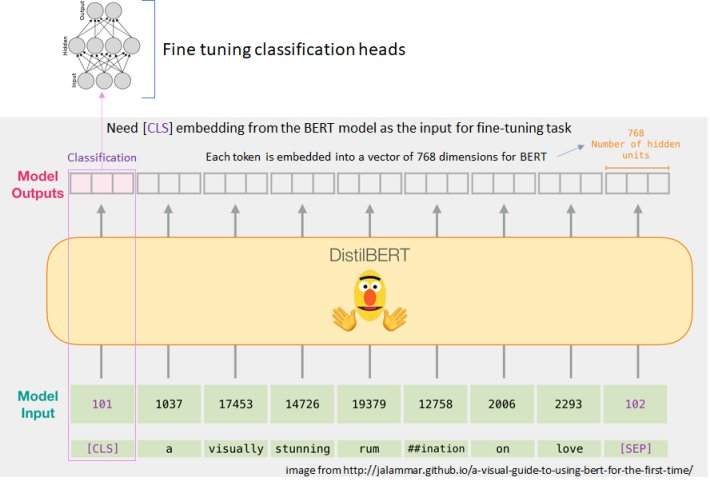


## What is the ouput?觀察Bert模型的輸出

    輸出有兩項: 若批量為25
    第0個: last_hidden_state=tensor(....)   torch.Size([25, 59, 768])  ==> 59 是 各批句子長度，各批長度都不一樣
    第1個: pooler_output=tensor(....)       torch.Size([25, 768])

    (1)last_hidden_state：shape是(batch_size, sequence_length, hidden_size)，hidden_size=768,它是模型輸出:批次的每個序列中每個標記的隱藏狀態
      
    (2)pooler_output：shape是(batch_size, hidden_size)，
    
    (3)hidden_states：這是輸出的一個可選項，如果輸出，需要指定config.output_hidden_states=True,它也是一個元組，它的第一個元素是embedding，其餘元素是各層的輸出，每個元素的形狀是(batch_size, sequence_length, hidden_size)
    
    attentions：這也是輸出的一個可選項，如果輸出，需要指定config.output_attentions=True,它也是一個元組，它的元素是每一層的注意力權重，用於計算self-attention heads的加權平均值
    
    outputs = bert_model(**token_out,output_hidden_states=True,output_attentions=True)

## About the last_hidden_state

    torch.Size([25, 59, 768])  
    ==>25是批量。 59 是各批一個句子有多少個字token(句子長度)，各批長度都不一樣，第一個字是CLS。768是向量維度
    
    做法有兩種: 必須試試看哪一種比較準確
    (1)last_hidden_state的輸出，進行global average pooling將3維度變成2維度[批量,768]
    (2)last_hidden_state的輸出，將3維度取得[CLS]切片，得到2維度[批量,768]

<img src='images/images-cls-state.jpg'>

<img src='https://i.stack.imgur.com/tjpn4.jpg' width='800'>

## Global Average Pooling (GAP)

    GAP的思路是使用GAP池化層的方式來降維，就是在底端的基礎模型(例如:BERT, Resnet50, CNN等卷積層)之後，用GAP替代FC全連線層。
    優點：
    (1)保留了前面底端的基礎模型提取到的空間信息\語義信息,所以在實際應用中效果提升也較爲明顯
    (2)與一般使用推平Flatten的方式比較，參數量較少(網路節點較少)，降低了參數數量會使模型更加健壯，抗過擬合效果更佳
    (3)GAP在特徵圖與最終的分類間轉換更加簡單，不會受到輸入大小的限制。

Global Average Pooling 1D
 
<img src='images/images-global-average-pooling.png' width="800">

Global Average Pooling 2D

在影像分類的任務中會使用Global Average Pooling 2D將一張RGB的3維度的影像降低到1個維度在接到FC層分類器，如下圖實例:

<img src='https://img2018.cnblogs.com/blog/891145/201811/891145-20181126095519997-676946079.png'  width='600'>

[來源]('https://www.itread01.com/content/1547374354.html')

# Load dataset

In [1]:
import pandas as pd

In [2]:
#df = pd.read_csv('news_dataset_preprocessed_for_django.csv',sep='|')
df = pd.read_csv('now_news_preprocessed.csv',sep='|')

In [3]:
df.head(1)

,item_id,date,category,title,content,sentiment,summary,top_key_freq,tokens,tokens_v2,entities,token_pos,link,photo_link
0,column/_20220505_1001,2022-05-05,焦點,配發率32%！富邦金每股配4元股利、現金股利歷史新高,富邦金控今（5）日公告，董事會決議通過擬配發普通股每股現金股利3.5元及股票股利0.5元，合...,0.0,"['富邦金這次同時配發股票股利每股0.5元', '包含富邦人壽上繳155.78億元、台北富邦...","[('股利', 18), ('富邦', 12), ('現金', 9), ('股票', 5),...","['富邦', '金控', '今', '（5', '）', '日', '公告', '，', '...","['富邦', '金控', '董事會', '通過', '普通股', '現金', '股利', '...","[NerToken(word='富邦金控', ner='ORG', idx=(0, 4)),...","[('富邦', 'Nb'), ('金控', 'Na'), ('今', 'Nd'), ('（5...",https://www.nownews.com/news/5796259,https://media.nownews.com/nn_media/thumbnail/2...


## Indexing: index to item_id

In [4]:
item_id2idx={}
idx2item_id={}
for id, i in df.item_id.items():
    item_id2idx[i] = id
    idx2item_id[id] = i

In [5]:
item_id2idx

{'column/_20220505_1001': 0,
 'column/_20220505_1002': 1,
 'column/_20220505_1003': 2,
 'column/_20220505_1004': 3,
 'news-summary/_20220505_1001': 4,
 'news-summary/_20220505_1002': 5,
 'news-summary/_20220505_1003': 6,
 'news-summary/_20220505_1004': 7,
 'news-summary/_20220505_1005': 8,
 'breaking/_20220505_1001': 9,
 'breaking/_20220505_1002': 10,
 'breaking/_20220505_1003': 11,
 'breaking/_20220505_1004': 12,
 'breaking/_20220505_1005': 13,
 'entertainment/_20220505_1001': 14,
 'entertainment/_20220505_1002': 15,
 'entertainment/_20220505_1003': 16,
 'entertainment/_20220505_1004': 17,
 'entertainment/_20220505_1005': 18,
 'novelty/_20220505_1001': 19,
 'novelty/_20220505_1002': 20,
 'novelty/_20220505_1003': 21,
 'novelty/_20220505_1004': 22,
 'novelty/_20220505_1005': 23,
 'life/_20220505_1001': 24,
 'life/_20220505_1002': 25,
 'life/_20220505_1003': 26,
 'life/_20220505_1004': 27,
 'life/_20220505_1005': 28,
 'finance/_20220505_1001': 29,
 'finance/_20220505_1002': 30,
 'financ

# Load Bert model

In [6]:
#!pip install transformers

In [7]:
# !pip install torch
# pip install torch==1.6.0+cpu torchvision==0.7.0+cpu -f https://download.pytorch.org/whl/torch_stable.html

#!pip install torch==1.8.2+cpu torchvision==0.9.2+cpu torchaudio===0.8.2 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html


In [8]:
from transformers import AutoModel, AutoTokenizer
from transformers import BertTokenizer, BertModel
import torch
import numpy as np

In [9]:
#model = AutoModel.from_pretrained('ckiplab/albert-tiny-chinese') # 中研院更輕量BERT
model = AutoModel.from_pretrained('ckiplab/albert-base-chinese') # 中研院輕量BERT
#model = AutoModel.from_pretrained('bert-base-chinese') # Google
#model = BertModel.from_pretrained('bert-base-chinese', output_hidden_states=True)

Downloading: 100%|██████████| 750/750 [00:00<00:00, 753kB/s]
Downloading: 100%|██████████| 38.5M/38.5M [00:04<00:00, 9.38MB/s]
Some weights of the model checkpoint at ckiplab/albert-base-chinese were not used when initializing AlbertModel: ['predictions.bias', 'predictions.LayerNorm.bias', 'predictions.decoder.weight', 'predictions.decoder.bias', 'predictions.dense.bias', 'predictions.dense.weight', 'predictions.LayerNorm.weight']
- This IS expected if you are initializing AlbertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertModel were not initialized from the model checkpoint at ckiplab/albert-base-chinese an

In [10]:
print(model)

AlbertModel(
  (embeddings): AlbertEmbeddings(
    (word_embeddings): Embedding(21128, 128, padding_idx=0)
    (position_embeddings): Embedding(512, 128)
    (token_type_embeddings): Embedding(2, 128)
    (LayerNorm): LayerNorm((128,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0, inplace=False)
  )
  (encoder): AlbertTransformer(
    (embedding_hidden_mapping_in): Linear(in_features=128, out_features=768, bias=True)
    (albert_layer_groups): ModuleList(
      (0): AlbertLayerGroup(
        (albert_layers): ModuleList(
          (0): AlbertLayer(
            (full_layer_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (attention): AlbertAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (attention_dropout): Dropout(p=0, inplace=False)
      

## Load tokenizer



In [11]:
tokenizer = AutoTokenizer.from_pretrained('ckiplab/albert-base-chinese')
#tokenizer = AutoTokenizer.from_pretrained('bert-base-chinese') # Google
# tokenizer = BertTokenizer.from_pretrained("bert-base-chinese")

Downloading: 100%|██████████| 174/174 [00:00<00:00, 174kB/s]
Downloading: 100%|██████████| 107k/107k [00:00<00:00, 156kB/s]  
Downloading: 100%|██████████| 112/112 [00:00<?, ?B/s] 


In [12]:
tokenizer

PreTrainedTokenizerFast(name_or_path='ckiplab/albert-base-chinese', vocab_size=21128, model_max_len=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

# Tokenizer編碼

In [13]:
# (1) A string
sentences = '水果很多對人有好處，比如蘋果'
sentences_tokens = tokenizer(sentences, return_tensors='pt')
sentences_tokens

{'input_ids': tensor([[ 101, 3717, 3362, 2523, 1914, 2205,  782, 3300, 1962, 5993, 8024, 3683,
         1963, 5981, 3362,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [14]:
# (2) A list of a string (A list contains only a string element)
sentences = ['水果很多對人有好處，比如蘋果']
sentences_tokens = tokenizer(sentences, return_tensors='pt')
sentences_tokens

{'input_ids': tensor([[ 101, 3717, 3362, 2523, 1914, 2205,  782, 3300, 1962, 5993, 8024, 3683,
         1963, 5981, 3362,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [15]:
# (3) A list of batch strings (A list contains several string elements)
sentences = ['水果很多對人有好處，比如蘋果','外國手機有很多都不错，比如蘋果','我喜歡吃不同水果，比如蘋果']
sentences_tokens = tokenizer(sentences, return_tensors='pt', padding=True, truncation=True)
#sentences_tokens = tokenizer(sentences, return_tensors='pt') # error
#sentences_tokens = tokenizer(sentences, return_tensors='pt', max_length=20, padding='max_length')
sentences_tokens

{'input_ids': tensor([[ 101, 3717, 3362, 2523, 1914, 2205,  782, 3300, 1962, 5993, 8024, 3683,
         1963, 5981, 3362,  102,    0],
        [ 101, 1912, 1751, 2797, 3582, 3300, 2523, 1914, 6963,  679, 7231, 8024,
         3683, 1963, 5981, 3362,  102],
        [ 101, 2769, 1599, 3631, 1391,  679, 1398, 3717, 3362, 8024, 3683, 1963,
         5981, 3362,  102,    0,    0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0]])}

# Bert的輸出

輸出的維度[3, 17, 768]，3表示批量，中間的維度17是字數，768是向量長度

In [16]:
# 送入模型取得輸出
# (2) A list of a string (A list contains only a string element)
sentences = ['水果很多對人有好處，比如蘋果']
#sentences = ['水果很多對人有好處，比如蘋果','外國手機有很多都不错，比如蘋果','我喜歡吃不同水果，比如蘋果']
sentences_tokens = tokenizer(sentences, return_tensors='pt', padding=True, truncation=True)
outputs = model(sentences_tokens.input_ids)

In [17]:
outputs

BaseModelOutputWithPooling(last_hidden_state=tensor([[[ 0.1013, -0.0104, -0.0303,  ...,  0.0479,  0.0259,  0.0390],
         [ 0.7448, -0.3410, -0.2156,  ...,  0.2374, -0.5448, -0.2546],
         [ 1.1505, -0.7310, -0.4481,  ...,  0.2867, -0.5794, -0.0653],
         ...,
         [ 0.1480,  0.0464, -0.1910,  ...,  0.0167, -0.5270, -0.1716],
         [ 0.6995, -0.3785,  0.0233,  ...,  0.0541, -0.7188,  0.2812],
         [ 0.0955, -0.0167, -0.0300,  ...,  0.0477,  0.0246,  0.0428]]],
       grad_fn=<NativeLayerNormBackward0>), pooler_output=tensor([[ 0.0280,  0.1447,  0.1903, -0.1638, -0.0168, -0.0419,  0.1174, -0.0903,
          0.1057, -0.0303,  0.0251,  0.1127, -0.0759, -0.0823,  0.0782, -0.0434,
          0.0589, -0.0356,  0.0172, -0.1010, -0.0574,  0.0239,  0.0678,  0.0753,
          0.0047,  0.0016, -0.1014, -0.0753,  0.1268, -0.2749, -0.0041,  0.1845,
          0.0941,  0.0749, -0.0600, -0.1554,  0.0146,  0.1519,  0.1313,  0.0486,
         -0.0698, -0.0139, -0.0122,  0.0761,  0.15

In [18]:
list(outputs)

['last_hidden_state', 'pooler_output']

In [19]:
outputs['last_hidden_state'].shape


torch.Size([1, 16, 768])

In [20]:
outputs['pooler_output'].shape

torch.Size([1, 768])

## 'last_hidden_state'向量平均

In [21]:
# 中間的維度是字數，此例是17
outputs['last_hidden_state'].shape

torch.Size([1, 16, 768])

In [22]:
last_hidden_state = outputs['last_hidden_state']

In [23]:
vectors = torch.mean(last_hidden_state, dim=1) # global_average_pooling shape (1, 768)

In [24]:
vectors.size()

torch.Size([1, 768])

In [25]:
vectors

tensor([[ 1.6976e-01, -1.6507e-01, -1.1538e-01,  6.0885e-02, -3.3758e-01,
          7.6232e-02, -4.1813e-02, -9.1139e-04,  5.3975e-02, -4.9231e-02,
         -3.1877e-02, -2.4234e-01,  3.2062e-01, -4.5942e-02, -1.2311e-01,
         -5.8558e-02, -1.1227e-01, -3.9125e-02,  4.6919e-01, -2.1179e-01,
         -7.7214e-02, -2.0720e-01, -5.5635e-02,  4.0997e-01,  1.3981e-01,
          1.1735e-01,  1.0266e-01,  2.2062e-01,  2.0283e-04,  2.7117e-02,
         -3.3598e-01, -7.8526e-01, -1.2152e-01,  1.8300e-01,  2.4748e-01,
         -2.2188e-01, -1.7569e-02,  2.8890e-02,  4.2054e-02, -2.7342e-03,
         -2.2754e-01, -6.0096e-02,  1.5023e-01,  8.0424e-03,  3.6072e-01,
         -3.3833e-01, -1.7850e-01, -1.3352e-01, -4.3545e-02,  1.3781e-01,
         -2.5791e-01,  8.7933e-02,  1.4905e-01,  8.6724e-02, -1.1088e-02,
         -2.0348e-02,  1.3039e-01, -1.8207e-01, -2.0819e-01, -2.5779e-01,
         -7.7849e-02, -1.0238e-01, -2.7244e-02, -1.4555e-01, -4.3418e-01,
         -6.0629e-02,  1.7174e-01, -4.

## Conver tensor to numpy for future usage

In [26]:
vectors

tensor([[ 1.6976e-01, -1.6507e-01, -1.1538e-01,  6.0885e-02, -3.3758e-01,
          7.6232e-02, -4.1813e-02, -9.1139e-04,  5.3975e-02, -4.9231e-02,
         -3.1877e-02, -2.4234e-01,  3.2062e-01, -4.5942e-02, -1.2311e-01,
         -5.8558e-02, -1.1227e-01, -3.9125e-02,  4.6919e-01, -2.1179e-01,
         -7.7214e-02, -2.0720e-01, -5.5635e-02,  4.0997e-01,  1.3981e-01,
          1.1735e-01,  1.0266e-01,  2.2062e-01,  2.0283e-04,  2.7117e-02,
         -3.3598e-01, -7.8526e-01, -1.2152e-01,  1.8300e-01,  2.4748e-01,
         -2.2188e-01, -1.7569e-02,  2.8890e-02,  4.2054e-02, -2.7342e-03,
         -2.2754e-01, -6.0096e-02,  1.5023e-01,  8.0424e-03,  3.6072e-01,
         -3.3833e-01, -1.7850e-01, -1.3352e-01, -4.3545e-02,  1.3781e-01,
         -2.5791e-01,  8.7933e-02,  1.4905e-01,  8.6724e-02, -1.1088e-02,
         -2.0348e-02,  1.3039e-01, -1.8207e-01, -2.0819e-01, -2.5779e-01,
         -7.7849e-02, -1.0238e-01, -2.7244e-02, -1.4555e-01, -4.3418e-01,
         -6.0629e-02,  1.7174e-01, -4.

In [27]:
# Error will arises
# vectors.numpy()

In [28]:
vectors.detach().numpy()

array([[ 1.69760004e-01, -1.65073350e-01, -1.15377732e-01,
         6.08849116e-02, -3.37575853e-01,  7.62323886e-02,
        -4.18134481e-02, -9.11389943e-04,  5.39745130e-02,
        -4.92309816e-02, -3.18767950e-02, -2.42336780e-01,
         3.20615828e-01, -4.59418334e-02, -1.23114750e-01,
        -5.85575365e-02, -1.12266153e-01, -3.91247272e-02,
         4.69185114e-01, -2.11785376e-01, -7.72137046e-02,
        -2.07202673e-01, -5.56348972e-02,  4.09969002e-01,
         1.39805540e-01,  1.17348887e-01,  1.02656603e-01,
         2.20622763e-01,  2.02825991e-04,  2.71172673e-02,
        -3.35976839e-01, -7.85260797e-01, -1.21520877e-01,
         1.83004737e-01,  2.47477919e-01, -2.21883908e-01,
        -1.75685789e-02,  2.88895033e-02,  4.20544781e-02,
        -2.73422943e-03, -2.27535546e-01, -6.00962862e-02,
         1.50227010e-01,  8.04239791e-03,  3.60715389e-01,
        -3.38334769e-01, -1.78499267e-01, -1.33520141e-01,
        -4.35449220e-02,  1.37811542e-01, -2.57908255e-0

In [29]:
with torch.no_grad():
    vectors.numpy()

# Calculate and get our news vectors 

處理新聞或文章長文本(超過512個字)

輸出的維度[5, 512, 768]，5表示批量，中間的維度512是字數，768是向量長度

In [30]:
# 送入模型取得輸出
# (2) A list of a string (A list contains only a string element)
sentences = df.content[0:5].to_list()
sentences_tokens = tokenizer(sentences, return_tensors='pt', padding=True, truncation=True)
outputs = model(sentences_tokens.input_ids)

In [31]:
outputs

BaseModelOutputWithPooling(last_hidden_state=tensor([[[ 0.1381, -0.1627, -0.0507,  ...,  0.1441,  0.3512, -0.1108],
         [-0.0231, -0.0467,  0.1648,  ...,  0.5063, -0.4393,  0.9800],
         [-0.4487, -0.2293, -0.2682,  ..., -0.0233, -0.2311,  0.4715],
         ...,
         [ 0.5917,  0.3526,  0.5878,  ..., -0.1662, -0.8841,  0.2136],
         [ 0.0210,  0.3679,  0.3241,  ...,  0.2847, -0.9964, -0.2062],
         [ 0.0632, -0.0029,  0.0412,  ...,  0.0191,  0.0831, -0.0098]],

        [[ 0.6256, -0.0440, -0.4238,  ...,  0.7383, -0.1124, -0.3186],
         [ 0.0340, -0.1568,  0.2307,  ...,  0.2773, -0.5769,  0.7656],
         [-0.3476, -0.6451, -0.5767,  ..., -0.0314, -0.2841,  0.5240],
         ...,
         [-0.9831,  0.3645,  0.2570,  ...,  0.5029,  0.2418,  0.8460],
         [-0.9804,  0.3694,  0.3201,  ...,  0.4555,  0.3758,  0.8584],
         [-0.7654,  0.3168,  0.1013,  ...,  0.3589, -0.0650,  0.7525]],

        [[ 0.0887,  0.0123,  0.0285,  ...,  0.0364,  0.0889,  0.0072],


In [32]:
list(outputs)

['last_hidden_state', 'pooler_output']

In [33]:
outputs['last_hidden_state'].shape


torch.Size([5, 512, 768])

In [34]:
outputs['pooler_output'].shape

torch.Size([5, 768])

## 'last_hidden_state'向量平均

In [35]:
outputs['last_hidden_state'].shape

torch.Size([5, 512, 768])

In [36]:
last_hidden_state = outputs['last_hidden_state']

In [37]:
vectors = torch.mean(last_hidden_state, dim=1) # global_average_pooling shape (1, 768)

In [38]:
vectors.size()

torch.Size([5, 768])

# Process all news 處理所有的新聞文章取得其向量

### Only TWO lines to get Bert output 取得所有新聞向量特徵

In [39]:
sentences = ['水果很多對人有好處，比如蘋果','外國手機有很多都不错，比如蘋果','我喜歡吃不同水果，比如蘋果']

In [40]:
sentences_tokens = tokenizer(sentences, return_tensors='pt', padding=True, truncation=True)
vectors = torch.mean(model(sentences_tokens.input_ids)['last_hidden_state'], dim=1).detach().numpy() # global_average_pooling shape (1, 768)

In [41]:
vectors

array([[ 0.00816341, -0.19782563, -0.12358171, ...,  0.16179916,
        -0.29546237,  0.03513928],
       [ 0.09242697,  0.01595772,  0.02621211, ...,  0.15370151,
        -0.33170968,  0.03214511],
       [-0.06087809, -0.20851351, -0.17370299, ...,  0.1452533 ,
        -0.48995805, -0.03513625]], dtype=float32)

In [42]:
vectors.shape

(3, 768)

## Get article vector one by one 逐筆取得所有新聞文章向量
必須逐筆處理，或是逐批處理，若一次全輸入，記憶體會爆掉

In [43]:
def get_vector(sentence):
    tokens = tokenizer(sentence, return_tensors='pt', truncation=True, padding=True)
    vector = torch.mean(model(tokens.input_ids)['last_hidden_state'], dim=1).detach().numpy() # global_average_pooling shape (1, 768)
    #vector = torch.mean(model(tokens.input_ids)['last_hidden_state'], dim=1) # global_average_pooling shape (1, 768)
    return vector[0] # (1, 768)第一個維度是批量1 回傳其向量一維度即可

In [44]:
df.shape

(3671, 14)

In [45]:
len(df.content.to_list())

3671

In [46]:
%%time
# It takes more than 2 minitues. 213 samples
sentences =  df.content.to_list()
news_vectors = [get_vector(sentence) for sentence in sentences]

CPU times: total: 4h 12min 4s
Wall time: 31min 54s


In [47]:
news_vectors = np.array(news_vectors)

In [48]:
news_vectors.shape

(3671, 768)

In [49]:
len(news_vectors)

3671

In [50]:
news_vectors[0].shape

(768,)

In [51]:
news_vectors[0]

array([ 2.14837223e-01, -1.63423032e-01, -1.09849140e-01,  1.35233447e-01,
       -7.54357874e-01,  1.87333807e-01,  2.71539930e-02,  9.59309936e-02,
        4.63584483e-01,  5.78989163e-02, -1.55138984e-01,  2.97037303e-01,
       -4.11229357e-02, -7.12548941e-02,  3.95352125e-01, -3.58094350e-02,
       -1.06307976e-01,  3.10256686e-02,  1.66665748e-01, -2.24747330e-01,
        2.26867106e-02, -5.28754890e-01, -2.55062934e-02,  4.10851896e-01,
        4.30844635e-01,  2.19653770e-02,  3.11066300e-01,  1.55193567e-01,
        2.95416117e-01, -5.53399682e-01, -5.19482017e-01,  9.28824425e-01,
       -1.65025800e-01,  4.15107831e-02,  1.21518165e-01,  7.36227185e-02,
       -2.70228237e-02,  9.83044691e-03, -1.81598380e-01, -1.02649279e-01,
       -2.81665940e-02, -4.02514562e-02, -1.60756052e-01,  9.91895236e-03,
       -4.08172548e-01, -2.00274080e-01, -2.60005295e-01,  1.03315756e-01,
        7.65116662e-02, -7.67675936e-02,  1.75932214e-01,  1.22564524e-01,
        4.05484289e-02,  

In [52]:
# # 全部一次放入記憶體會爆掉，必須分批次處理
# sentences =  df.content.to_list()
# sentences_tokens = tokenizer(sentences, return_tensors='pt', padding=True, truncation=True)
# news_vectors = torch.mean(model(sentences_tokens.input_ids)['last_hidden_state'], dim=1).detach().numpy() # global_average_pooling shape (1, 768)

## 向量特徵存檔

用到時讀出來即可。

In [53]:
# save to npy file
#np.savez_compressed('news_vectors.npz', news_vectors)
#news_vectors = np.load('news_vectors.npz')

In [54]:
np.save('news_vectors.npy',news_vectors)

In [55]:
news_vectors = np.load('news_vectors.npy')

In [56]:
news_vectors.shape

(3671, 768)

In [57]:
news_vectors[0]

array([ 2.14837223e-01, -1.63423032e-01, -1.09849140e-01,  1.35233447e-01,
       -7.54357874e-01,  1.87333807e-01,  2.71539930e-02,  9.59309936e-02,
        4.63584483e-01,  5.78989163e-02, -1.55138984e-01,  2.97037303e-01,
       -4.11229357e-02, -7.12548941e-02,  3.95352125e-01, -3.58094350e-02,
       -1.06307976e-01,  3.10256686e-02,  1.66665748e-01, -2.24747330e-01,
        2.26867106e-02, -5.28754890e-01, -2.55062934e-02,  4.10851896e-01,
        4.30844635e-01,  2.19653770e-02,  3.11066300e-01,  1.55193567e-01,
        2.95416117e-01, -5.53399682e-01, -5.19482017e-01,  9.28824425e-01,
       -1.65025800e-01,  4.15107831e-02,  1.21518165e-01,  7.36227185e-02,
       -2.70228237e-02,  9.83044691e-03, -1.81598380e-01, -1.02649279e-01,
       -2.81665940e-02, -4.02514562e-02, -1.60756052e-01,  9.91895236e-03,
       -4.08172548e-01, -2.00274080e-01, -2.60005295e-01,  1.03315756e-01,
        7.65116662e-02, -7.67675936e-02,  1.75932214e-01,  1.22564524e-01,
        4.05484289e-02,  

## 所有文章之兩兩相似度矩陣

若日後會用到，可以存檔，用到時讀出來即可。

好處: 相較於向量，載入到記憶體，所占空間較少。

In [58]:
from sklearn.metrics.pairwise import cosine_similarity

In [59]:
news_sim_martrix = cosine_similarity(news_vectors, news_vectors)

In [60]:
news_sim_martrix.shape

(3671, 3671)

In [61]:
news_sim_martrix

array([[0.9999999 , 0.83899814, 0.86634135, ..., 0.75511634, 0.656828  ,
        0.89913166],
       [0.83899814, 1.0000005 , 0.8431661 , ..., 0.77377945, 0.7371737 ,
        0.80108637],
       [0.86634135, 0.8431661 , 1.        , ..., 0.8043401 , 0.7281811 ,
        0.8654269 ],
       ...,
       [0.75511634, 0.77377945, 0.8043401 , ..., 0.9999999 , 0.87344134,
        0.9030129 ],
       [0.656828  , 0.7371737 , 0.7281811 , ..., 0.87344134, 0.99999946,
        0.82391536],
       [0.89913166, 0.80108637, 0.8654269 , ..., 0.9030129 , 0.82391536,
        1.0000001 ]], dtype=float32)

## Save similarity matrix相似矩陣存檔

In [62]:
import numpy as np

np.save('news_sim_martrix.npy', news_sim_martrix)

news_sim_martrix = np.load('news_sim_martrix.npy')

# Given an article, find topk similar articles輸入一篇文章編號找出Topk相似的文章

以第0為例，列出其與其他0 1 2 3 4 新聞的相似度

設法去排序相似度，從大到小排列，先放到字典中 再加以排序!

In [57]:
item_id = 'aipl_20220314_1'

In [58]:
idx = item_id2idx[item_id]

In [59]:
idx

0

In [60]:
df.content[0]

'民眾捐贈烏克蘭的愛心物資持續湧入外交部，截至今天傍晚累計已收到約4000箱，外交部長吳釗燮中午親自到現場為協助整理物資的志工加油，並對捐贈民眾表達感謝。外交部晚間發布新聞稿指出，外交部從7日開始向民間募集捐贈烏克蘭難民的物資，獲得熱烈響應，親赴外交部捐贈物資的民眾約1730人，加上郵寄包裹，目前約已收到4000箱物資，品項以醫療口罩、毛毯、女性衛生用品、尿片、餅乾等為主，募集活動將持續到18日。外交部表示，為了感謝捐贈民眾，與在現場辛苦分類整理的志工、外交部人員，吳釗燮今天中午特別前往外交部西側門地下停車場視察，吳釗燮與在場的慈濟等民間慈善組織志工，以及其他自發到場幫忙的善心人士親切互動，對於也有烏克蘭旅台人士自願擔任義工在現場協助，吳釗燮特別致意慰問。根據外交部提供的照片，到場幫忙的烏克蘭志工是極為關心家鄉情勢的網紅佳娜。外交部再度提醒有意捐贈物資的民眾，捐贈物品請依照外交部網站所公布的清單為限，切勿捐贈或郵寄二手物品或衣物。送到外交部的捐贈物品務必為全新物品、未拆封包裝、有效期至少6個月以上，以免造成整理及後續轉運捐贈的困擾。募集截止時間是3月18日下午5時以前，民眾可以用面送或郵寄清單所列的20類物品及 14 類藥品至外交部。外交部除感謝熱心民眾踴躍捐贈援助烏克蘭人道物資外，也感謝許多志工義務幫忙、貢獻己力。外交部對各界人士奉獻時間與精神投入國際人道援助，表達最高的敬意。'

In [61]:
news_sim_martrix[0]

array([0.9999998 , 0.9174469 , 0.94938207, 0.9395569 , 0.92970437,
       0.9408637 , 0.8830892 , 0.9336939 , 0.9442798 , 0.84513533,
       0.92080164, 0.9573866 , 0.7678695 , 0.8802419 , 0.9435698 ,
       0.9442524 , 0.8399701 , 0.78930306, 0.91470945, 0.86353123,
       0.7897497 , 0.93918246, 0.80850077, 0.91272825, 0.91116065,
       0.8969931 , 0.7999083 , 0.91297996, 0.88283706, 0.88108975,
       0.8246819 , 0.7702099 , 0.7263723 , 0.8713766 , 0.92216694,
       0.7851186 , 0.7903313 , 0.8716409 , 0.91040504, 0.9185297 ,
       0.9229113 , 0.91459775, 0.90835387, 0.8016374 , 0.9078376 ,
       0.70441484, 0.8123727 , 0.86765456, 0.86391056, 0.7552579 ,
       0.91369724, 0.8989641 , 0.87185115, 0.89839983, 0.76005787,
       0.9063851 , 0.9251373 , 0.8006022 , 0.7912509 , 0.85611224,
       0.8132658 , 0.9222623 , 0.91080964, 0.74044126, 0.8011912 ,
       0.8272553 , 0.85394824, 0.81214225, 0.83194894, 0.91457695,
       0.847842  , 0.79579055, 0.64966345, 0.55002373, 0.80580

In [62]:
news_sim_martrix[0][:20]

array([0.9999998 , 0.9174469 , 0.94938207, 0.9395569 , 0.92970437,
       0.9408637 , 0.8830892 , 0.9336939 , 0.9442798 , 0.84513533,
       0.92080164, 0.9573866 , 0.7678695 , 0.8802419 , 0.9435698 ,
       0.9442524 , 0.8399701 , 0.78930306, 0.91470945, 0.86353123],
      dtype=float32)

## Sort 排序取最相似的k個新聞與相似度

In [63]:
sim_dict = {}
idx = item_id2idx[item_id]  # 0 for 'aipl_20220314_1'
for i, value in enumerate(news_sim_martrix[idx]):
    sim_dict[i]=value

In [64]:
sim_dict

{0: 0.9999998,
 1: 0.9174469,
 2: 0.94938207,
 3: 0.9395569,
 4: 0.92970437,
 5: 0.9408637,
 6: 0.8830892,
 7: 0.9336939,
 8: 0.9442798,
 9: 0.84513533,
 10: 0.92080164,
 11: 0.9573866,
 12: 0.7678695,
 13: 0.8802419,
 14: 0.9435698,
 15: 0.9442524,
 16: 0.8399701,
 17: 0.78930306,
 18: 0.91470945,
 19: 0.86353123,
 20: 0.7897497,
 21: 0.93918246,
 22: 0.80850077,
 23: 0.91272825,
 24: 0.91116065,
 25: 0.8969931,
 26: 0.7999083,
 27: 0.91297996,
 28: 0.88283706,
 29: 0.88108975,
 30: 0.8246819,
 31: 0.7702099,
 32: 0.7263723,
 33: 0.8713766,
 34: 0.92216694,
 35: 0.7851186,
 36: 0.7903313,
 37: 0.8716409,
 38: 0.91040504,
 39: 0.9185297,
 40: 0.9229113,
 41: 0.91459775,
 42: 0.90835387,
 43: 0.8016374,
 44: 0.9078376,
 45: 0.70441484,
 46: 0.8123727,
 47: 0.86765456,
 48: 0.86391056,
 49: 0.7552579,
 50: 0.91369724,
 51: 0.8989641,
 52: 0.87185115,
 53: 0.89839983,
 54: 0.76005787,
 55: 0.9063851,
 56: 0.9251373,
 57: 0.8006022,
 58: 0.7912509,
 59: 0.85611224,
 60: 0.8132658,
 61: 0.9

In [65]:
df.content[11]

'財團法人賑災基金會今天表示，賑濟烏克蘭專戶開設到今天下午4時10分，累計收到善款已突破新台幣6億元。其中，收到紐約台灣商會捐入一筆3萬5703美元、折合新台幣約101萬元的捐款。俄烏戰事未歇，為協助烏克蘭難民，外交部2日透過財團法人賑災基金會開立烏克蘭捐款專戶。4月1日將截止捐款，其中線上多元支付刷卡服務將於4月1日中午12時關閉，超商及虛擬ATM付款則將於3月27日晚間11時59分先行關閉。基金會透過新聞稿指出，今天收到一筆3萬5703美元（折合新台幣約101萬元），是由紐約台灣商會（Taiwanese Chamber of Commerce of New York）捐入。紐約台灣商會創立於1976年，是北美歷史悠久的台商團體，致力於促進商業、回饋社區且支持台灣事務。這次捐款援助烏克蘭難民，顯示海外僑胞不分遠近的關心以及善意。基金會統計，其中實體帳戶統計新台幣4億7222萬元；透過挖貝線上多元支付平台則收到1億3788萬元，累計共6億1010萬元。目前捐款筆數達10萬筆。透過轉帳匯款帳戶比例為55%，線上多元支付比例為45%。基金會表示，目前已收得善款，已提撥1億元交外交部進行運用，交給波蘭政府指定的賑濟烏克蘭難民專責單位。基金會表示，常見問題已整理在官方網站上，其他最新消息及專戶明細則在網站烏克蘭援助專區中揭露。民眾可上網查詢閱覽，或撥打捐款諮詢專線（02）8912-7779等方式詢問。'

In [66]:
from operator import itemgetter
sorted_sim_dict = sorted(sim_dict.items(), key= itemgetter(1), reverse=True)

In [70]:
topk_sim_dict = sorted_sim_dict[1:5] # skip 0 自己跟自己的相似度

In [71]:
topk_sim_dict

[(184, 0.9656638), (11, 0.9573866), (99, 0.9557085), (87, 0.95532256)]

In [72]:
for idx, value in topk_sim_dict:
    print(value, df.content.iloc[idx])

0.9656638 俄羅斯揮軍烏克蘭，當地博物館與文物館也受波及。國立故宮博物院擁有近70萬件文物，多名立委今天建議故宮針對戰爭思考對策，故宮預計未來3個月研擬方案，7月推演。故宮院長吳密察赴立法院教育及文化委員會報告業務並備質詢。民進黨籍立委吳思瑤表示，烏克蘭最大的利沃夫博物館擁有1萬多件藏品，包含阿克提卡市地方歷史博物館、伊萬基夫歷史博物館、哈爾科夫藝術博物館建築物也被戰火破壞，文資保留不易，故宮應思考相關對策。民進黨籍立委張廖萬堅指出，根據「國立故宮博物院災害緊急應變作業要點」第9條，已規範實施文物搶救時機包含發放空襲警報時，且故宮應不定時動員測試搶救文物訓練。無黨籍立委黃國書表示，同一作業要點第15條指出，文物搶救步驟包含開櫃、取出文物或裝箱，再來要運送文物至安全暫存點，是否已有確切「安全暫存點」。國民黨籍立委萬美玲表示，除文物以外，也要確保擁有專業知識的故宮人力，是否足夠撤退文物。吳密察表示，故宮曾針對不同緊急應變實施多次演習，最近一次為今年1月消防演練，但並非針對戰爭或空襲的演練。且據他所知，故宮來台後從未做過相關準備。吳密察表示，故宮文物69萬多件，若演練時要真正將文物打包裝箱，茲事體大，需如何分級模擬打包、撤退，未來3個月將研擬對策。至於安全暫存點，吳密察說，物品疏散有各式各樣的防禦方法，「腦海中其實沒有這樣的地方。有安全的地方，但是否符合文物要求的環境？我們是不知道的」，預計未來3個月也將和國家安全單位了解相關地點。吳密察向媒體表示，故宮預計3個月內組成戰爭演習相關小組，預計7月推盤模擬演練。
0.9573866 財團法人賑災基金會今天表示，賑濟烏克蘭專戶開設到今天下午4時10分，累計收到善款已突破新台幣6億元。其中，收到紐約台灣商會捐入一筆3萬5703美元、折合新台幣約101萬元的捐款。俄烏戰事未歇，為協助烏克蘭難民，外交部2日透過財團法人賑災基金會開立烏克蘭捐款專戶。4月1日將截止捐款，其中線上多元支付刷卡服務將於4月1日中午12時關閉，超商及虛擬ATM付款則將於3月27日晚間11時59分先行關閉。基金會透過新聞稿指出，今天收到一筆3萬5703美元（折合新台幣約101萬元），是由紐約台灣商會（Taiwanese Chamber of Commerce of New York）捐入。紐約台灣商會創立於1976年，是北美歷史悠久的台商團體，致力於促

## Define get_topk_news()

寫成一個方法，方便呼叫

In [73]:
from operator import itemgetter
import pandas as pd
import numpy as np

In [74]:
df = pd.read_csv('cna_news_200_preprocessed.csv',sep='|')

In [75]:
news_sim_martrix = np.load('news_sim_martrix.npy')

In [76]:
item_id2idx={}
idx2item_id={}
for id, i in df.item_id.items():
    item_id2idx[i] = id
    idx2item_id[id] = i

In [77]:
def get_topk_news(item_id, news_sim_martrix, topk=3):
    sim_dict = {}
    idx = item_id2idx[item_id]
    for i, value in enumerate(news_sim_martrix[idx]):
        sim_dict[i]=value
    topk = sorted(sim_dict.items(), key= itemgetter(1), reverse=True)[1:topk+1]
    return topk

In [78]:
item_id = 'aipl_20220314_4'
#item_id = 'acn_20220313_20'
news_sim = get_topk_news(item_id, news_sim_martrix, topk=3)

In [79]:
for idx, value in news_sim:
    print(value, df.content.iloc[idx])

0.9642696 立委關注如何建立從網路平台移除假訊息的機制，NCC主委陳耀祥表示，牽涉多方利害關係人意見，持續溝通中，希望3月底前可以提出數位通訊傳播服務法草案。立法院交通委員會今天邀國家通訊傳播委員會（NCC）主委陳耀祥列席報告業務概況及當前立法計畫。民進黨立委林楚茵、許智傑關注假訊息下架機制為何，媒體若引述假訊息應該如何處理。陳耀祥表示，行政院有不實訊息防治平台，各機關彼此分工，屬於聯防概念。如果謠言訊息違反社會秩序維護法而被裁罰，有可能下架；或違反兒少法時，可透過iWIN網路內容防護機構，通知社群平台下架相關訊息，但是，法規上目前確實無法要求網路平台立即下架假訊息。陳耀祥表示，數通法牽涉平台責任義務以及網路治理議題，由於網路態樣很多，多方利害關係人意見不同，希望3月底可以提出數通法草案。以鳳梨丟棄相關假訊息為例，可能屬於農委會權責，依數通法規劃，農委會先啟動認定訊息是否為假、做出裁處，後續NCC相關機制來負責執行、通知平台下架等。對於媒體若引述假訊息，陳耀祥說明，目前NCC規管的廣電媒體，在衛廣法規範製播新聞不能違反事實查證原則，具體執行上會針對個案做判斷。NCC專案報告指出，去年12月29日公布數位通訊傳播服務法草案架構，後續將透過說明會、公聽會及機關協商等程序，持續聽取各界意見。
0.960541 俄烏戰爭讓外界看見低軌通訊衛星的重要性，NCC主委陳耀祥表示，國家在戰時調動民間通訊與傳播資源，都有相關作業流程確保關鍵基礎設施正常，在開放低軌通訊衛星部分，也會把國安、資安議題納入考量。立法院交通委員會今天邀請國家通訊傳播委員會（NCC）主任委員陳耀祥列席報告業務概況及當前立法計畫。民進黨立委林俊憲、無黨籍立委趙正宇呼籲台灣應該部署低軌通訊衛星，民進黨立委陳素月、劉世芳則關注台灣在低軌通訊衛星開放進度。趙正宇詢問近期俄烏戰爭爆發後，各國也看見低軌通訊衛星的重要性，詢問發生戰爭能否確保通訊不中斷。陳耀祥表示，軍事戰之外，現在更強調資訊戰。國家在戰時調動民間通訊與傳播資源，都有標準作業流程。第一時間會確保關鍵基礎設施狀態，災防或戰爭下，電信或低軌通訊衛星如何持續使用，國安會也有開會討論。陳耀祥表示，低軌通訊衛星部分，國安規劃也會列為重點，行政院3月11日核定交通部先前預告的「無線電頻率供應計畫」修正草案，後續NCC將修訂相關法規，完成作業流程後就會開放業者申請